In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from sklearn.metrics import classification_report


In [3]:
data_dir = "/content/drive/MyDrive/Major/Fake-V-Real-Dataset"
categories = ['real', 'fake']
img_size = 48
dataset = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv.imread(os.path.join(path, img))
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255.0
            dataset.append([new_array, class_label])
        except Exception as e:
            pass

random.shuffle(dataset)

X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

# Print shapes to verify
print(X.shape)
print(y.shape)


(13407, 48, 48, 3)
(13407,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10725, 48, 48, 3)
(2682, 48, 48, 3)
(10725,)
(2682,)


In [5]:
with open("X_train.pickle", "wb") as pickle_out:
    pickle.dump(X_train, pickle_out, protocol=4)

with open("y_train.pickle", "wb") as pickle_out:
    pickle.dump(y_train, pickle_out, protocol=4)

with open("X_test.pickle", "wb") as pickle_out:
    pickle.dump(X_test, pickle_out, protocol=4)

with open("y_test.pickle", "wb") as pickle_out:
    pickle.dump(y_test, pickle_out, protocol=4)

with open("X_train.pickle", "rb") as pickle_in:
    X_train = pickle.load(pickle_in)

with open("y_train.pickle", "rb") as pickle_in:
    y_train = pickle.load(pickle_in)

with open("X_test.pickle", "rb") as pickle_in:
    X_test = pickle.load(pickle_in)

with open("y_test.pickle", "rb") as pickle_in:
    y_test = pickle.load(pickle_in)

# Print shapes to verify
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10725, 48, 48, 3)
(10725,)
(2682, 48, 48, 3)
(2682,)


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [19]:
# prompt: model.fit(X_train, y_train, epochs=15) also take vallidation

model.fit(
    X_train,
    y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    batch_size=16
)


Epoch 1/15
671/671 [==============================] - 57s 86ms/step - loss: 0.2143 - accuracy: 0.9115 - val_loss: 0.2533 - val_accuracy: 0.8990
Epoch 2/15
671/671 [==============================] - 57s 85ms/step - loss: 0.2112 - accuracy: 0.9108 - val_loss: 0.2541 - val_accuracy: 0.8915
Epoch 3/15
671/671 [==============================] - 60s 90ms/step - loss: 0.1878 - accuracy: 0.9195 - val_loss: 0.2841 - val_accuracy: 0.8743
Epoch 4/15
671/671 [==============================] - 56s 84ms/step - loss: 0.1815 - accuracy: 0.9232 - val_loss: 0.3293 - val_accuracy: 0.8531
Epoch 5/15
671/671 [==============================] - 55s 81ms/step - loss: 0.1637 - accuracy: 0.9311 - val_loss: 0.3529 - val_accuracy: 0.8456
Epoch 6/15
671/671 [==============================] - 57s 85ms/step - loss: 0.1604 - accuracy: 0.9342 - val_loss: 0.2857 - val_accuracy: 0.8915
Epoch 7/15
671/671 [==============================] - 54s 81ms/step - loss: 0.1724 - accuracy: 0.9253 - val_loss: 0.2380 - val_accuracy:

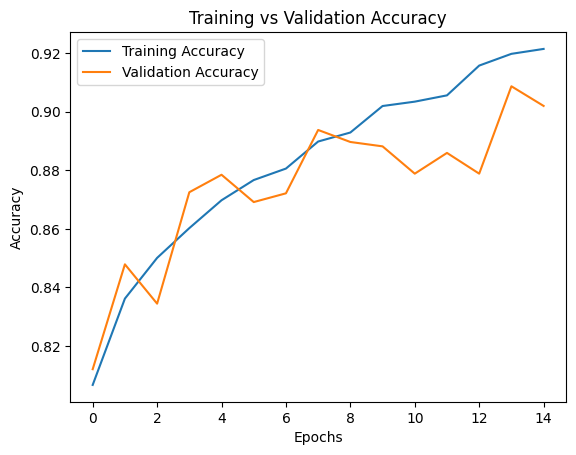

In [20]:
import matplotlib.pyplot as plt
# Get the training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(len(training_accuracy))

# Plot the training and validation accuracy values
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')

# Add legend and show plot
plt.legend()
plt.show()


In [21]:
model.save("AI-V-Real-V2.h5")
model_new = keras.models.load_model("AI-V-Real-V2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model_new.evaluate(X_test, y_test)
y_pred = model_new.predict(X_test)

y_predicted = [1 if arr > 0.5 else 0 for arr in y_pred]

# Print classification report
print(classification_report(y_test, y_predicted))


84/84 [==============================] - 4s 53ms/step
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       674
           1       0.96      0.89      0.92      2008

    accuracy                           0.88      2682
   macro avg       0.84      0.88      0.86      2682
weighted avg       0.90      0.88      0.89      2682



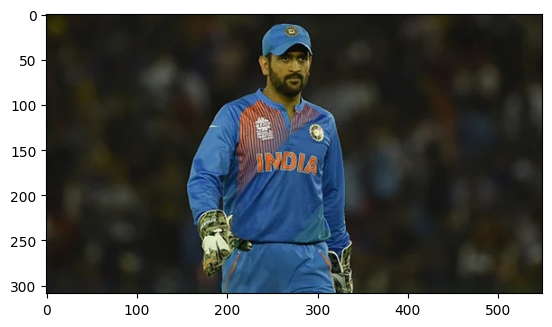

1/1 [==============================] - 0s 56ms/step
The given image is Real.


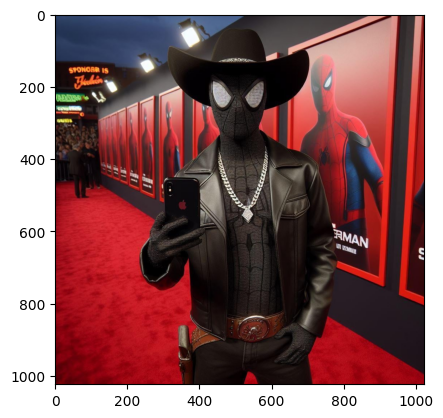

1/1 [==============================] - 0s 74ms/step
The given image is AI Generated.


In [27]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(cv.cvtColor(img_arr, cv.COLOR_BGR2RGB))
    plt.show()

    new_arr = cv.resize(img_arr, (48, 48))
    new_arr = new_arr / 255.0
    test = np.array([new_arr]).reshape(-1, img_size, img_size, 3)

    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

# Example usage
path_img = '/content/dhoni-2016-getty_1654515327472_1657137509048.jpeg'
find_out(path_img)

path_img = '/content/12.jpg'
find_out(path_img)
